# ANALYSIS ON GOOGLE PLAYSTORE

Welcome to the analysyis on google play store.Hope you enjoy the notebook!!Let's start without any delay!!!

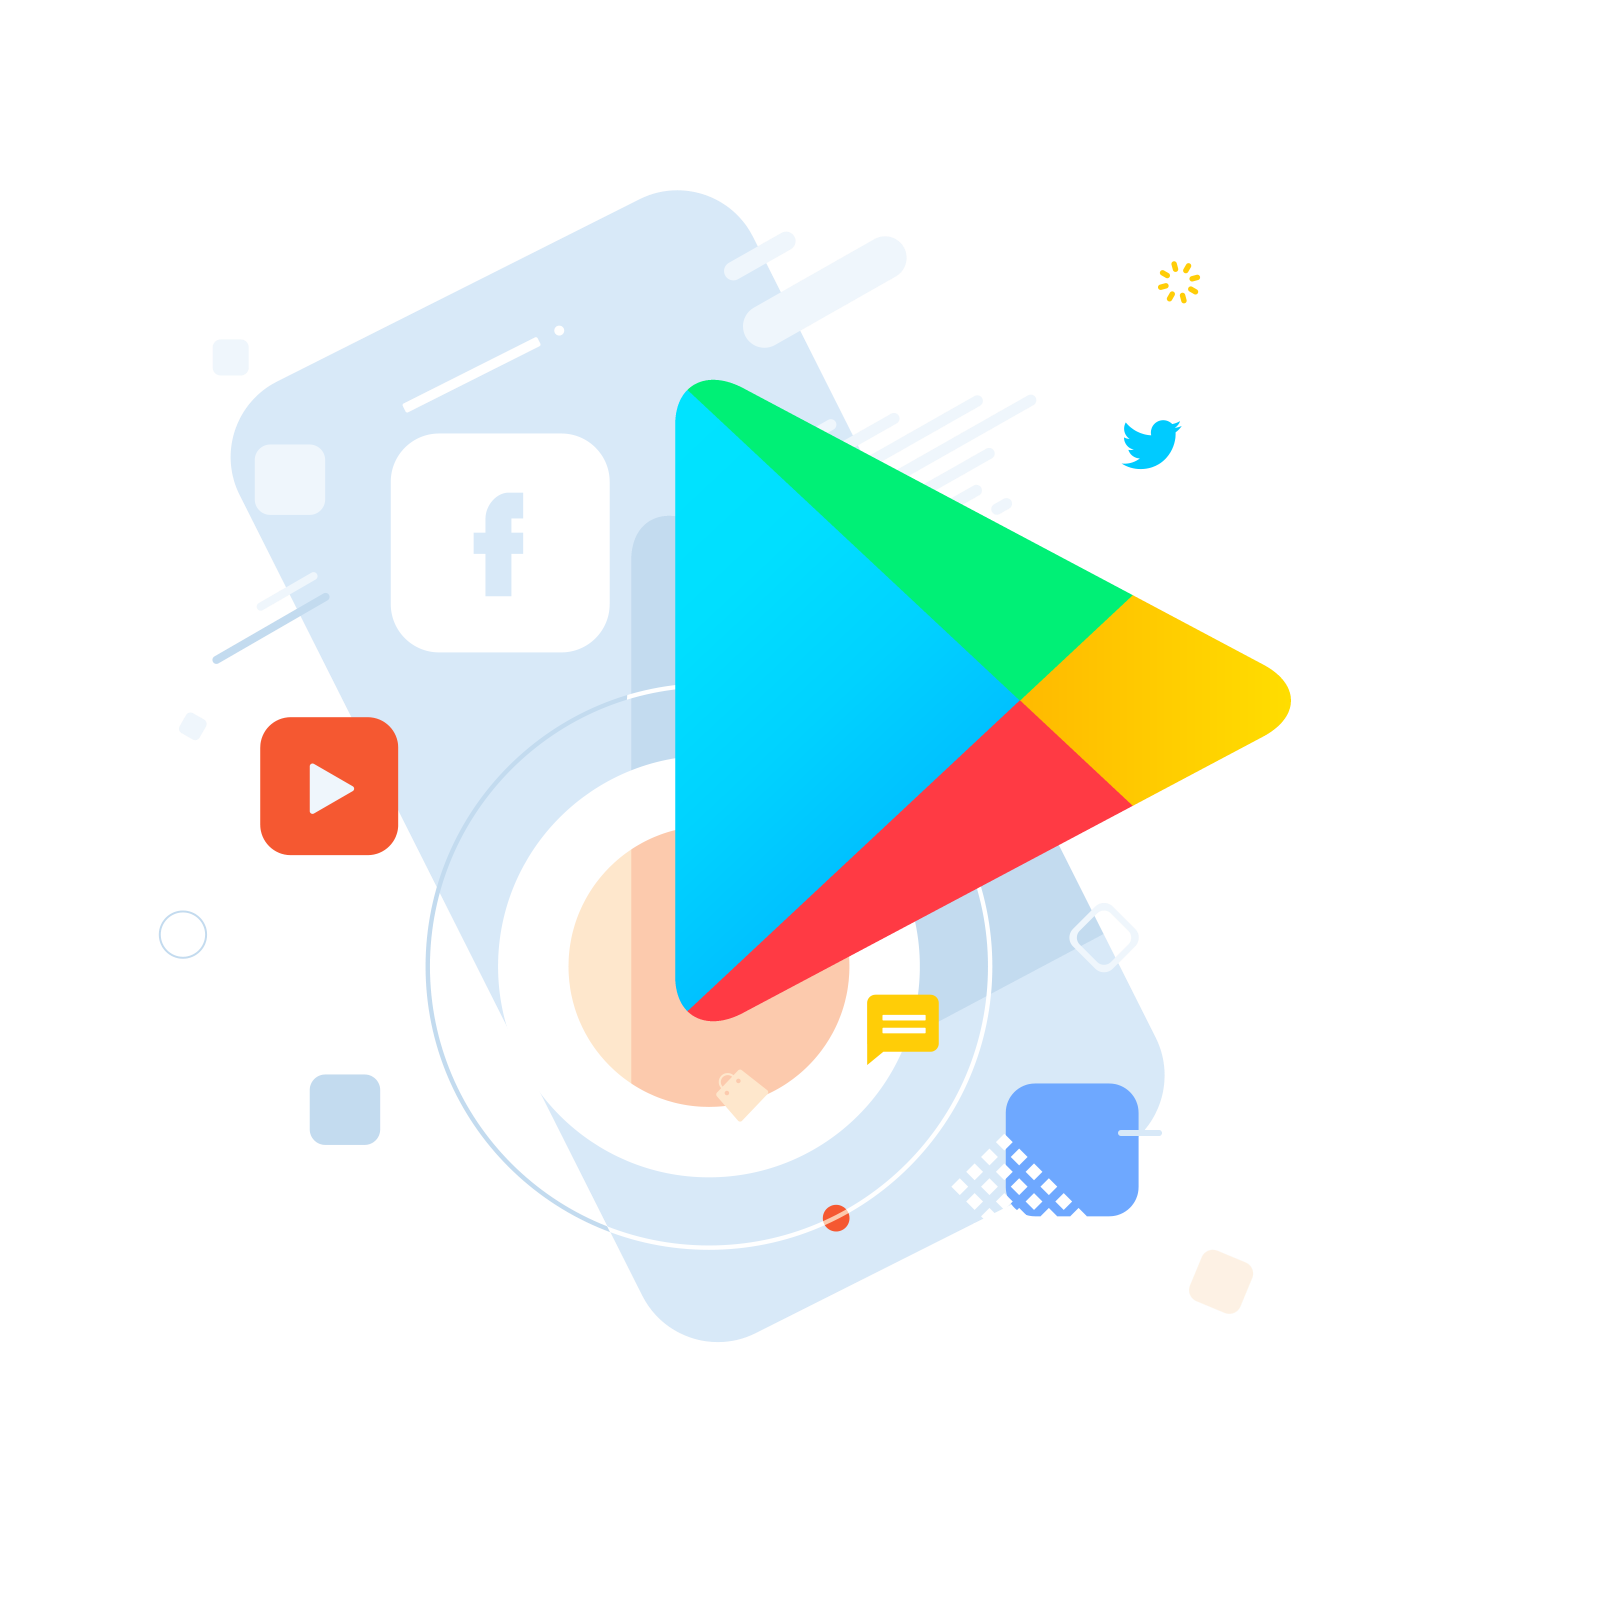

**Google Play, formerly Android Market, is a digital distribution service operated and developed by Google and launched on March 6,2012. It serves as the official app store for devices running on "Google certified" Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import seaborn as sbn
%matplotlib inline

In [2]:
apps = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


**DATA EXPLORATION AND DATA WRANGLING**

In [3]:
rows,columns = apps.shape
print(f'The no.of rows are : {rows}')
print(f'The no.of columns are : {columns}')

The no.of rows are : 10841
The no.of columns are : 13


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Let's check whether dataframe contains any duplicate values*

In [5]:
apps.App.nunique()

9660

There are 10841 total apps in dataframe but the number of unique apps are only 9660 so this says that some of the apps in the dataframe are duplicated.Let's cross check it if any apps are duplicated.....

In [6]:
apps.App.duplicated().any()

True

Yesss!!! the apps are duplicated.Let's drop the duplicate apps from the dataframe as this duplicate data is of no use and moreover it may mislead us..

In [7]:
apps.drop_duplicates(subset='App',keep='first',inplace=True)

In [8]:
apps.shape

(9660, 13)

Ok!! Done with deleting the duplicate apps


Now lets fix some missing values...

In [9]:
apps.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are almost 1470 unrated apps on playstore.As they are unrated let's conider there ratings as 0..

In [10]:
apps['Rating']=apps['Rating'].fillna(0)

In [11]:
apps.Type.value_counts()

Free    8902
Paid     756
0          1
Name: Type, dtype: int64

One of the apps also shows value '0' so lets consider it as Free..

In [12]:
apps['Type']=apps['Type'].replace('0','Free')

In [13]:
apps['Type']=apps['Type'].replace(np.nan,'Free')

In [14]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

For the missing value in the Content Rating column we can just use as 'Everyone'...

In [15]:
apps['Content Rating'] = apps['Content Rating'].replace(np.nan,'Everyone')

The rows for Current Ver contains null values so let's consider it as the most initial version of the app i.e 1.0.0

In [16]:
apps['Current Ver'] =apps['Current Ver'].replace(np.nan,'1.0.0')

For the Android Ver lets consider as Ver 1.0.0 and Above i.e [For all mobile Phones] as replacement to null values..

In [17]:
apps['Android Ver'] = apps['Android Ver'].replace(np.nan,'1.0 and up')

In [18]:
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Hurrahhh!!! missing values  fixed!!!!

Now Ler's distinguish between categorical and numerical values...

There's a app called Life Made WI-Fi Touchscreen Photo Frame with data in inappropriate format let's delete that app from dataframe..


In [19]:
unwanted=apps['App']=='Life Made WI-Fi Touchscreen Photo Frame'
apps.drop(index=apps[unwanted].index,inplace=True)
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Let's typecast some columns......

In [21]:
apps['Reviews']=apps.Reviews.astype('int64')

In [22]:
apps['Installs']=apps['Installs'].apply(lambda a :a.replace(',',''))
apps['Installs']=apps['Installs'].apply(lambda a :a.replace('+',''))
apps['Installs']=apps['Installs'].astype('int64')

In [23]:
apps['date'] = pd.to_datetime(apps['Last Updated'])
apps['year_of_update'] = apps['date'].dt.year
apps.drop('Last Updated',axis=1,inplace=True)

In [24]:
apps['Price'] = apps['Price'].apply(lambda x : x.replace('$',''))
apps['Price'] = apps['Price'].astype('float64')

In [25]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   object        
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Current Ver     9659 non-null   object        
 11  Android Ver     9659 non-null   object        
 12  date            9659 non-null   datetime64[ns]
 13  year_of_update  9659 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
m

# DATA ANALYSIS

**DATA READY FOR ANALYSIS!!**

**CATEGORY**

In [26]:
apps['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

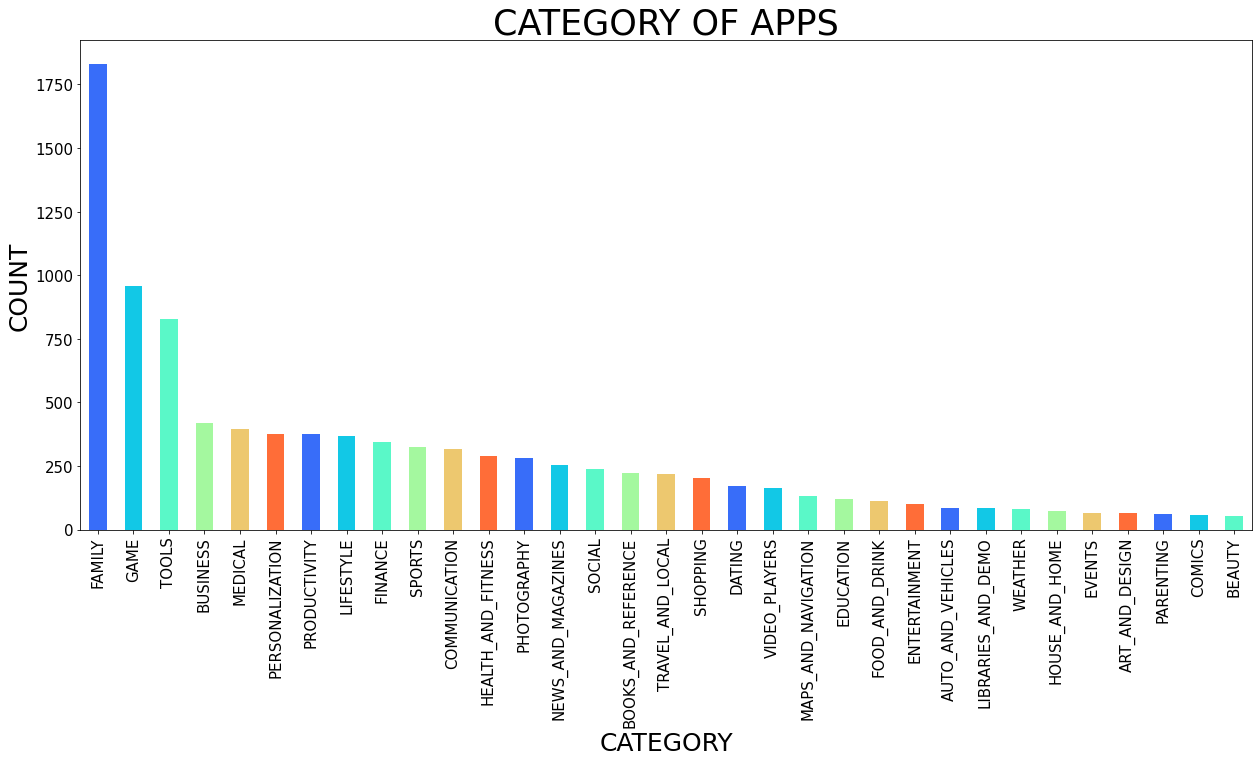

In [27]:
plt.figure(figsize=[21,9])

apps['Category'].value_counts().plot.bar(color=sbn.color_palette('rainbow'))
plt.xlabel('CATEGORY',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CATEGORY OF APPS',fontsize=35)
plt.show()

In [28]:
category=round(apps.groupby(['Category']).mean('Rating').sort_values('Rating',ascending=0),2).reset_index()
category

,Category,Rating,Reviews,Installs,Price,year_of_update
0,EDUCATION,4.33,112303.76,2965983.19,0.15,2017.36
1,ART_AND_DESIGN,4.15,22175.05,1786532.81,0.09,2017.81
2,ENTERTAINMENT,4.14,340810.29,20722156.86,0.08,2017.85
3,GAME,4.04,648903.76,14472288.23,0.30,2017.22
4,COMICS,4.03,41822.70,803234.82,0.00,2017.77
5,PHOTOGRAPHY,3.89,374915.55,16545009.45,0.42,2017.38
6,WEATHER,3.87,155634.99,4570892.66,0.41,2017.38
7,SHOPPING,3.77,220553.12,6932419.73,0.03,2017.74
8,VIDEO_PLAYERS,3.67,414015.75,24091427.73,0.06,2017.23
9,FAMILY,3.67,78507.36,2416998.64,1.31,2017.21


Top Categories base don Ratings...

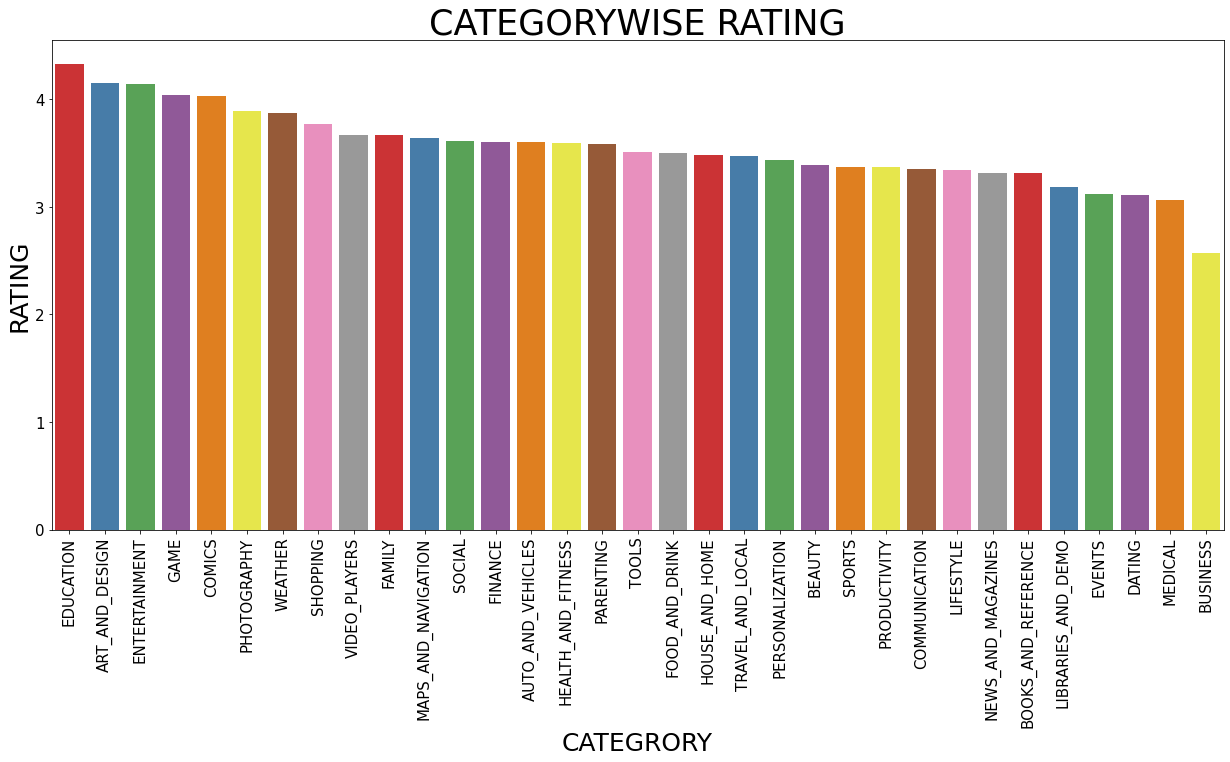

In [29]:
plt.figure(figsize=[21,9])

sbn.barplot(x='Category',y='Rating',data=category,palette='Set1')
plt.xlabel('CATEGRORY',fontsize=25)
plt.xticks(rotation=90)
plt.ylabel('RATING',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CATEGORYWISE RATING',fontsize=35)
plt.show()

Here we can see that apps related to education . art and design,entertainment,etc categories are top rated!!

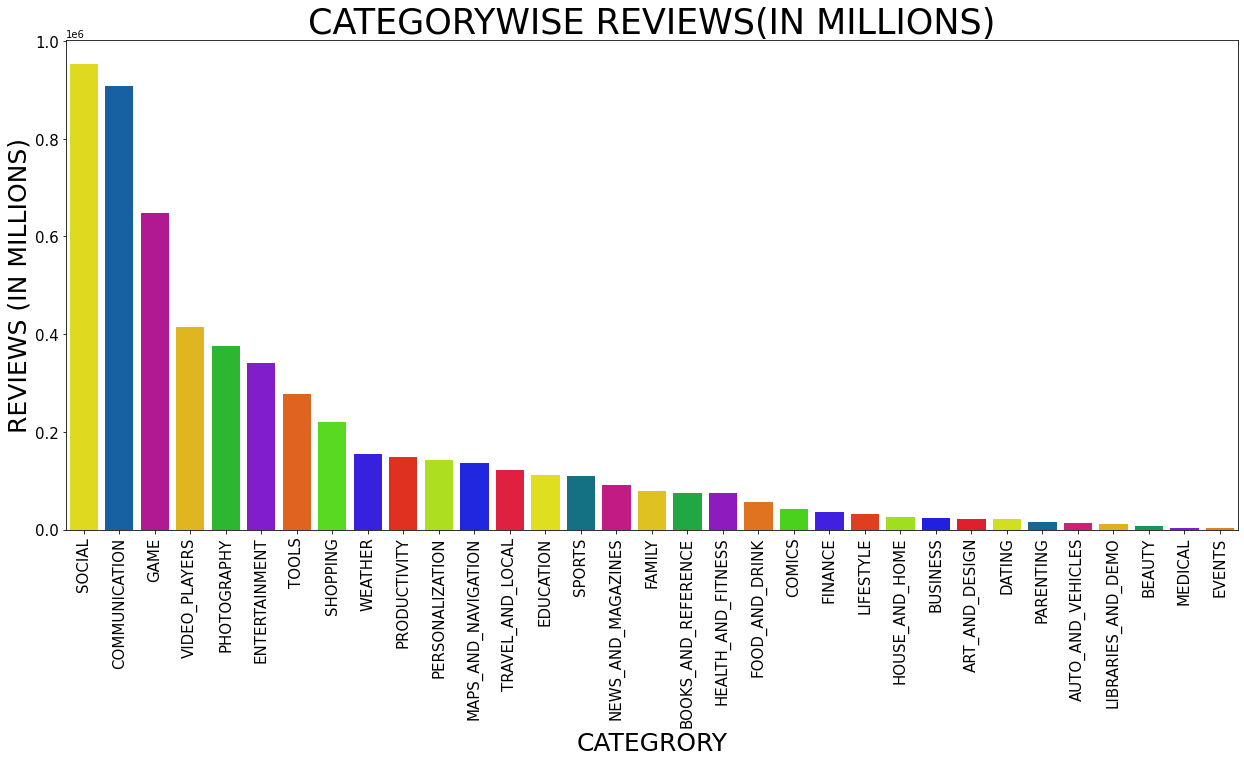

In [30]:
plt.figure(figsize=[21,9])
sbn.barplot(x='Category',y='Reviews',data=category.sort_values('Reviews',ascending=0),palette='prism')
plt.xlabel('CATEGRORY',fontsize=25)
plt.xticks(rotation=90)
plt.ylabel('REVIEWS (IN MILLIONS)',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CATEGORYWISE REVIEWS(IN MILLIONS)',fontsize=35)
plt.show()

Here we can see that Communication,Social,Games,etc Categories are top reviewed categories...

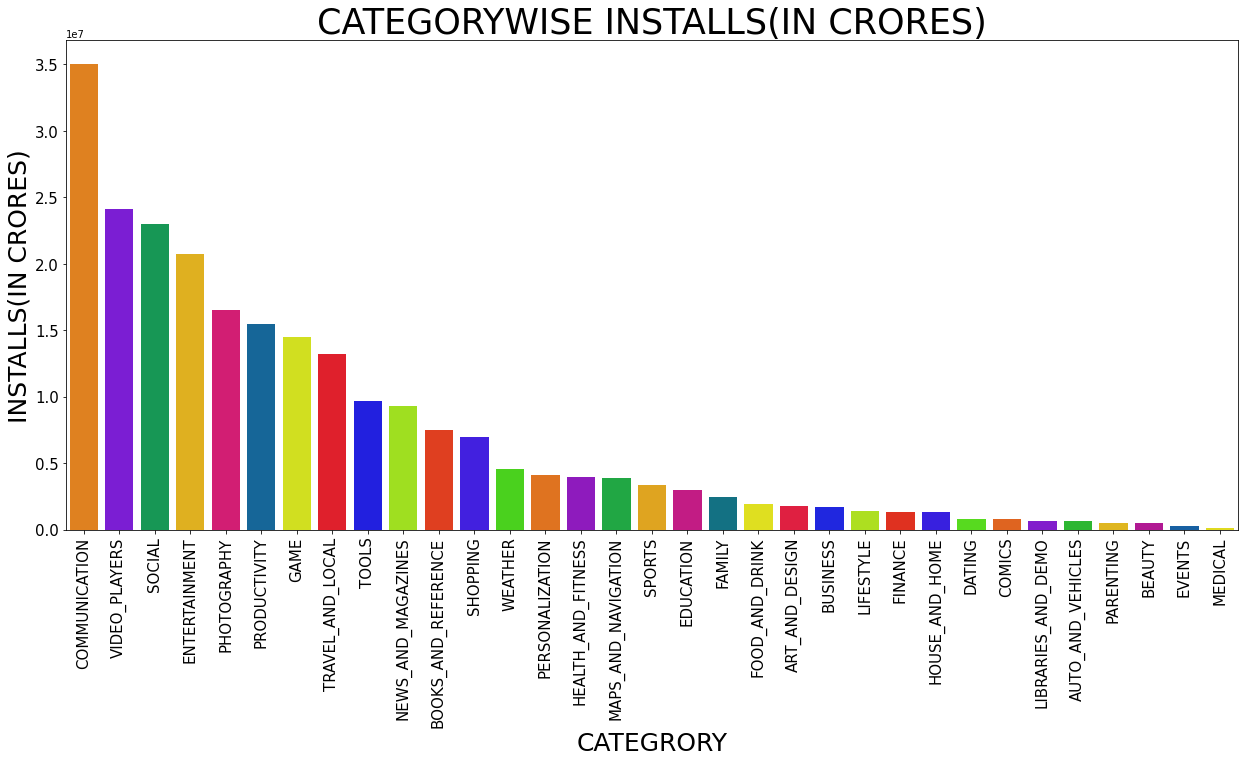

In [31]:
plt.figure(figsize=[21,9])
sbn.barplot(x='Category',y='Installs',data=category.sort_values('Installs',ascending=0),palette='prism_r')
plt.xlabel('CATEGRORY',fontsize=25)
plt.xticks(rotation=90)
plt.ylabel('INSTALLS(IN CRORES)',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CATEGORYWISE INSTALLS(IN CRORES)',fontsize=35)
plt.show()


Communication is the most important aspect of our day to day life ....apps related to Communication,VideoPlayers Categories are most downloaded on playstore....

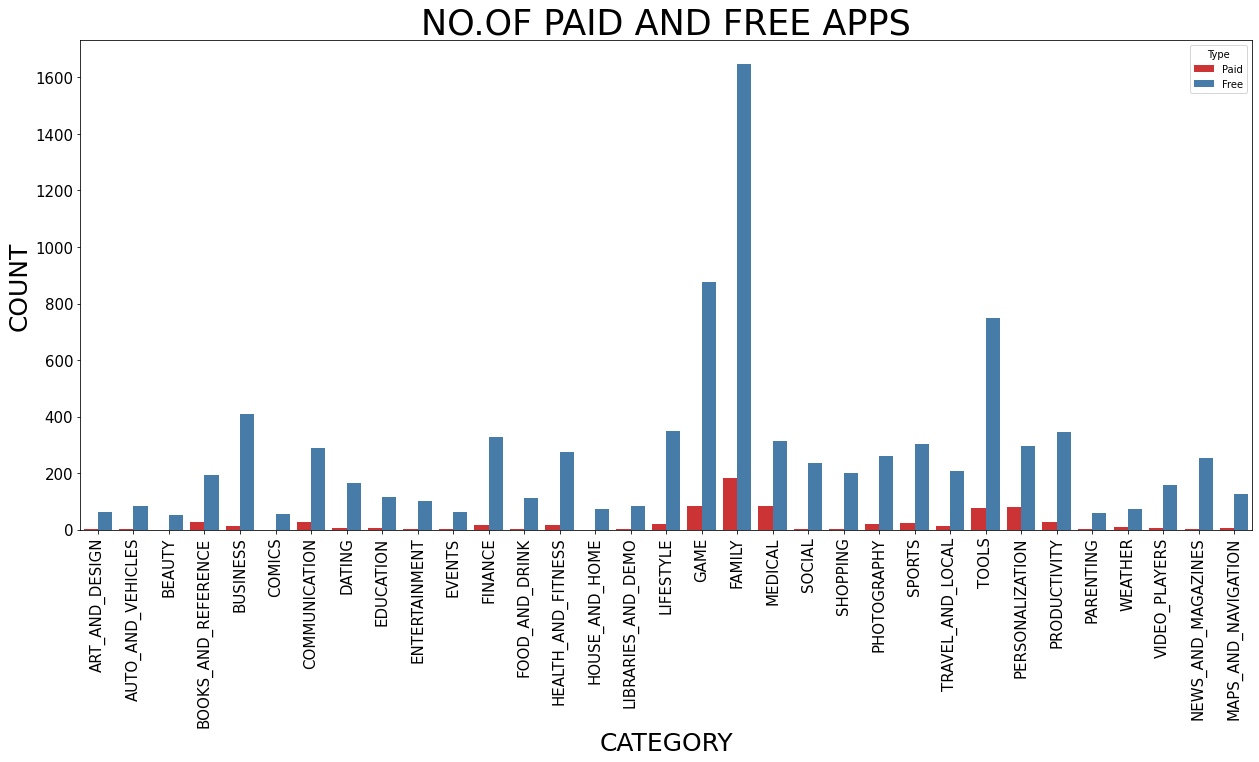

In [32]:
plt.figure(figsize=[21,9])
sbn.countplot(x='Category',data=apps,hue='Type',palette='Set1',hue_order=['Paid','Free'])
plt.xlabel('CATEGORY',fontsize=25)
plt.xticks(rotation=90)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('NO.OF PAID AND FREE APPS',fontsize=35)
plt.show()

Here as we can see that most of the apps are free to use but for some categories like Family,Personalization,Game,etc there are also number of paid apps..... 

**RATING**

Considering apps with rating 0 star....['They we unrated apps so we assumed them as zero']

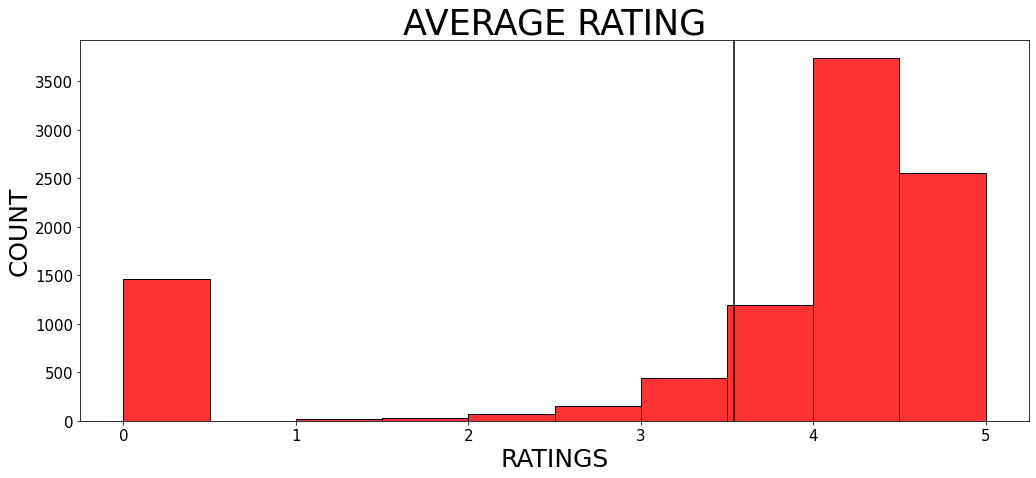

Considering Unrated Apps as 0 we found the average rating of applications on playstore valued 3.54 which we displayed using axvline as average


In [33]:
plt.figure(figsize=[17,7])
avg=round(apps['Rating'].mean(),2)
plt.hist(apps['Rating'],edgecolor='black',color='#ff3333')
plt.axvline(avg,color='black')
plt.xlabel('RATINGS',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('AVERAGE RATING',fontsize=35)
plt.show()
print(f'Considering Unrated Apps as 0 we found the average rating of applications on playstore valued {avg} which we displayed using axvline as average')

Some may think...How can we consider unrated apps as 0 ? So for this reason lets also plot another histogram excluding zero ratings....

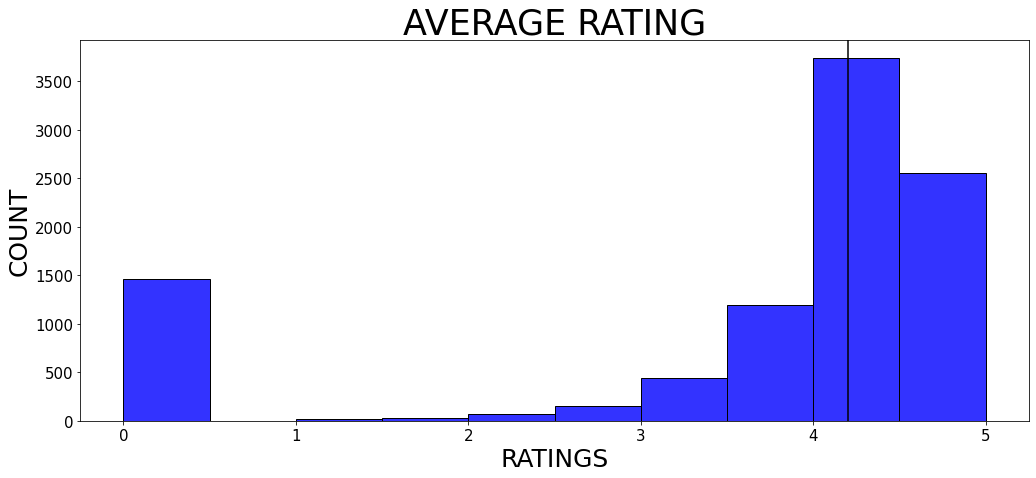

We have considered ratings of unrated apps as 0 but in some cases it may not be true so for this reason plotting another histogram with totally excluding 0 ratings with average rating valued as 4.2 which we displayed using axvline


In [34]:
plt.figure(figsize=[17,7])
avg=round(apps['Rating'].median(),2)
plt.hist(apps['Rating'],color='#3333ff',edgecolor='black')
plt.axvline(avg,color='black')
plt.xlabel('RATINGS',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('AVERAGE RATING',fontsize=35)
plt.show()
print(f'We have considered ratings of unrated apps as 0 but in some cases it may not be true so for this reason plotting another histogram with totally excluding 0 ratings with average rating valued as {avg} which we displayed using axvline')

**REVIEWS**

In [35]:
reviews = apps.nlargest(10,'Reviews')
reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year_of_update
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,2018-08-03,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,2018-08-03,2018
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,2018-07-31,2018
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,2018-08-01,2018
1670,Clash of Clans,GAME,4.6,44891723,98M,100000000,Free,0.0,Everyone 10+,Strategy,10.322.16,4.1 and up,2018-07-15,2018
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,500000000,Free,0.0,Everyone,Tools,Varies with device,Varies with device,2018-08-03,2018
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up,2018-07-12,2018
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,Varies with device,Varies with device,2018-08-02,2018
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,4.6.6,Varies with device,2018-08-04,2018
1660,Clash Royale,GAME,4.6,23133508,97M,100000000,Free,0.0,Everyone 10+,Strategy,2.3.2,4.1 and up,2018-06-27,2018


From the above dataframe we can see that all of the top most reviewed apps are FREE and can be used by mostly everyone..These are also some of the important factors that contributes to the success of these apps..

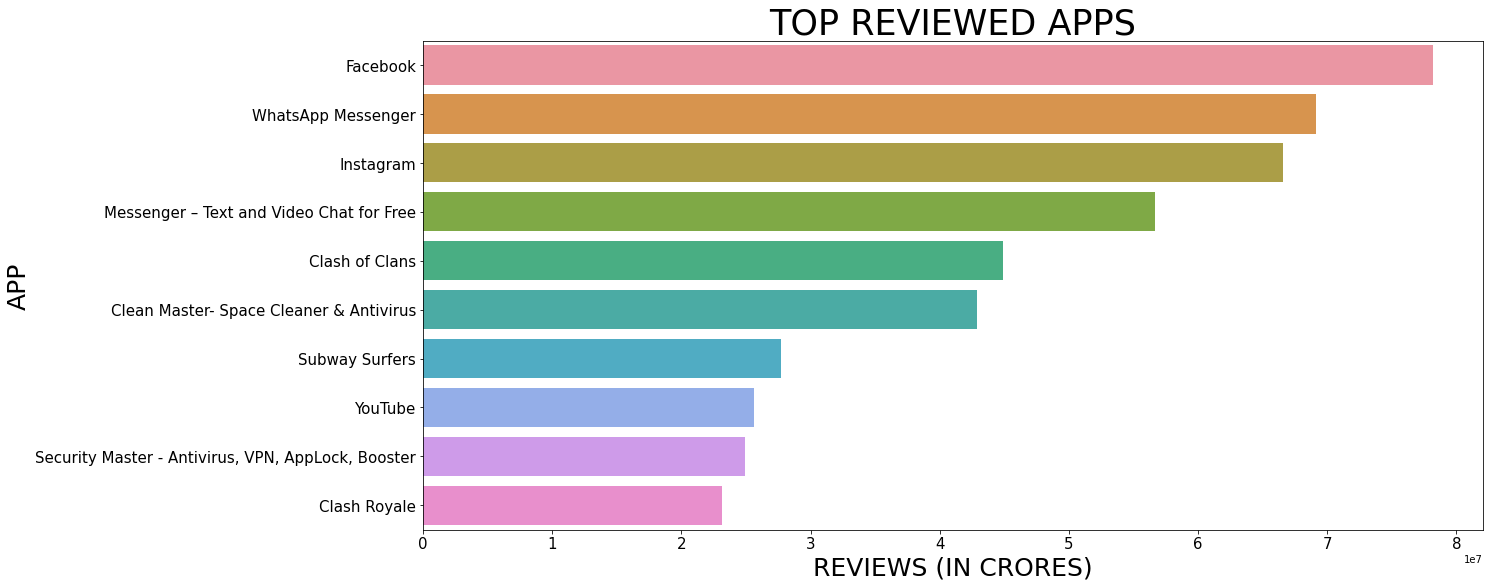

In [36]:
plt.figure(figsize=[19,9])
sbn.barplot(x='Reviews',y='App',data=reviews)
plt.xlabel('REVIEWS (IN CRORES)',fontsize=25)
plt.ylabel('APP',fontsize=25)
plt.title('TOP REVIEWED APPS',fontsize=35)
plt.tick_params(labelsize=15)
plt.show()

*In the reviews dataframe we can observe that the apps with most reviews also have top ratings i.e above 4.0 So taking into account this observation we can also find out the most popular apps on Play Store*

In [37]:
popular = ((apps['Reviews']>50000000) & (apps['Rating']>4.0))
popular_apps = apps.loc[popular,['App','Rating','Reviews']].sort_values('Reviews',ascending=0)
popular_apps

,App,Rating,Reviews
2544,Facebook,4.1,78158306
336,WhatsApp Messenger,4.4,69119316
2545,Instagram,4.5,66577313


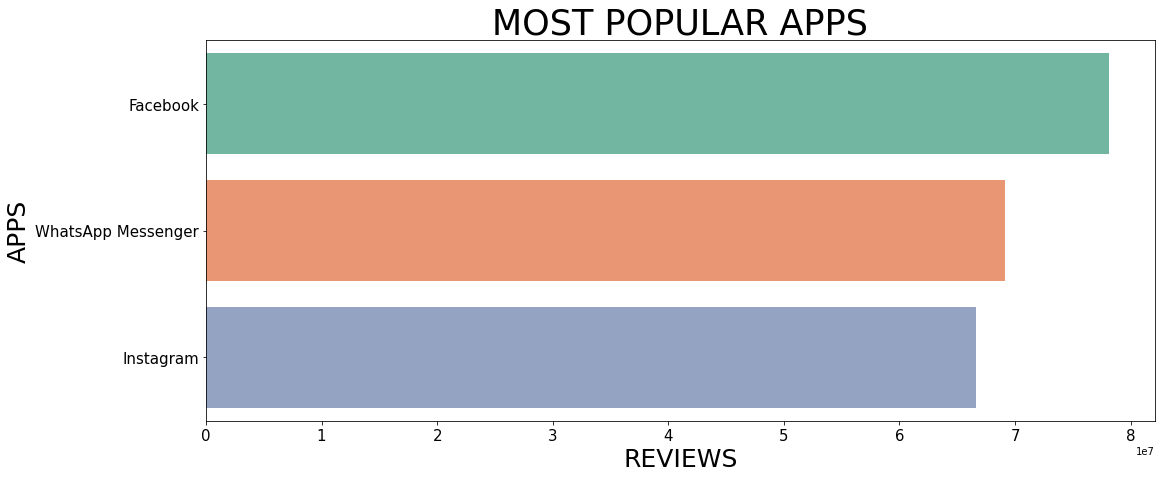

In [38]:
plt.figure(figsize=[17,7])
sbn.barplot(x='Reviews',y='App',data=popular_apps,palette='Set2')
plt.xlabel('REVIEWS',fontsize=25)
plt.ylabel('APPS',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('MOST POPULAR APPS',fontsize=35)
plt.show()

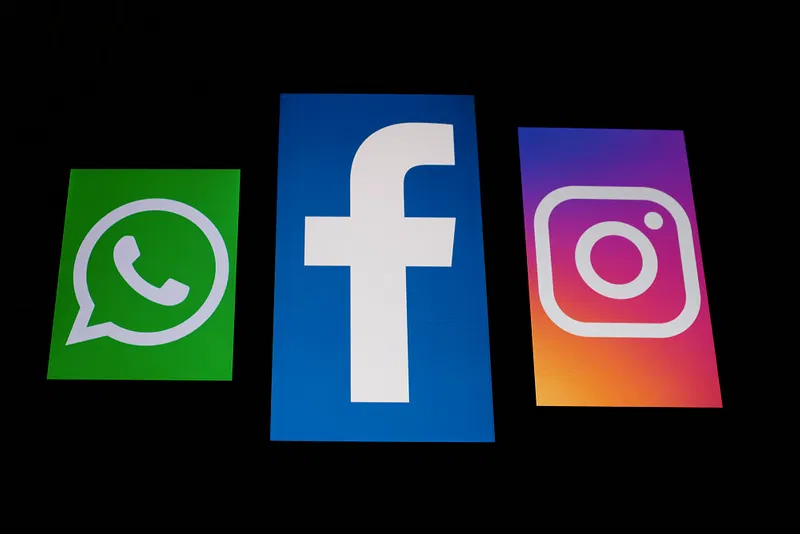

No Wonder why Mark Zuckerberg is FOURTH RICHEST PERSON in the World...The apps like Facebook,Instagram,Whatsapp are most famous apps on playstore..

**TYPE**

In [39]:
apps['Type'].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [40]:
lab=['Free','Paid']

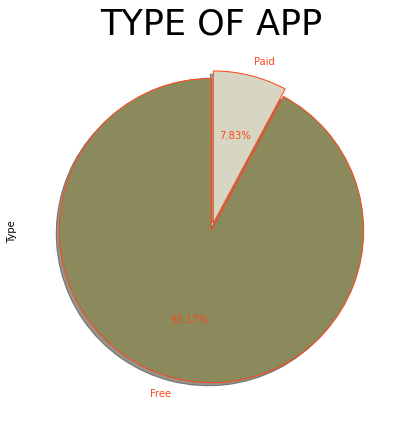

In [41]:
plt.figure(figsize=[7,7])
apps['Type'].value_counts().plot.pie(labels=lab,colors=['#8a8a5c','#d6d6c2'],autopct='%1.2f%%',startangle=90,wedgeprops={'edgecolor':'#ff471a'},explode=[0.0,0.05],shadow=True,textprops={'color':'#ff471a'})
plt.title('TYPE OF APP',fontsize=35)
plt.show()

Here we can see that about 92% apps on Google Play Store are free...

*Also we have seen above that apps of certain categories like game,personalisation,etc have comparatively more number of paid apps than other categories*

**PRICE**

In [42]:
costly_apps = apps.nlargest(10,'Price')
costly_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year_of_update
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,1.0.1,4.1 and up,2018-05-03,2018
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,1.0,7.0 and up,2018-07-16,2018
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,1.0.0,4.4 and up,2018-03-11,2018
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,2.0,4.0.3 and up,2018-01-12,2018
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,3.0,4.4 and up,2018-05-19,2018
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,1.6,4.0 and up,2017-11-12,2017
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,1.0,4.1 and up,2017-12-11,2017
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,3.4,4.4 and up,2017-05-01,2017
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000,Paid,399.99,Everyone,Entertainment,1.54,1.6 and up,2017-05-30,2017
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,1000,Paid,399.99,Teen,Finance,2,4.0.3 and up,2017-12-06,2017


The apps related to Finance,Lifestyle Category are int the list of most expensive apps.From the above information we can see that people are not that interested in these apps and so they have less no of installs and also these apps are averagely rated...

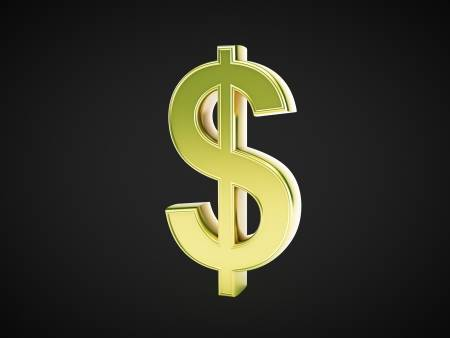

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


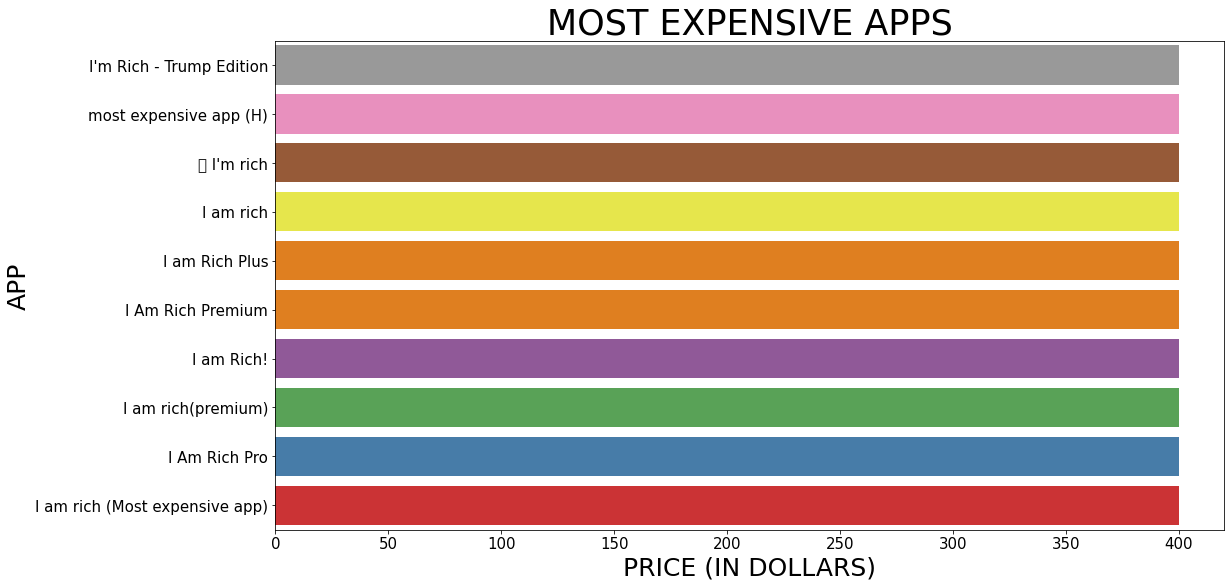

In [43]:
plt.figure(figsize=[17,9])
sbn.barplot(x='Price',y='App',data=costly_apps,palette='Set1_r')
plt.xlabel('PRICE (IN DOLLARS)',fontsize=25)
plt.ylabel('APP',fontsize=25)
plt.title('MOST EXPENSIVE APPS',fontsize=35)
plt.tick_params(labelsize=15)
plt.show()

All of these top apps have price almost equal to 400$ ...Too Costly!!!

Let's see which are some of the popular paid apps ...

In [44]:
popular_paid = ((apps['Type']=='Paid') & (apps['Rating']>4.2) & (apps['Reviews']>100000))
popular_paid_apps = apps.loc[popular_paid,['App','Category','Rating','Reviews','Installs','Type','Price']].sort_values('Reviews',ascending=False)
popular_paid_apps

,App,Category,Rating,Reviews,Installs,Type,Price
2241,Minecraft,FAMILY,4.5,2376564,10000000,Paid,6.99
4034,Hitman Sniper,GAME,4.6,408292,10000000,Paid,0.99
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,1000000,Paid,6.99
8860,Bloons TD 5,FAMILY,4.6,190086,1000000,Paid,2.99
9678,Where's My Water?,FAMILY,4.7,188740,1000000,Paid,1.99
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,1000000,Paid,2.99
5490,True Skate,SPORTS,4.4,129409,1000000,Paid,1.99
5631,Five Nights at Freddy's,GAME,4.6,100805,1000000,Paid,2.99


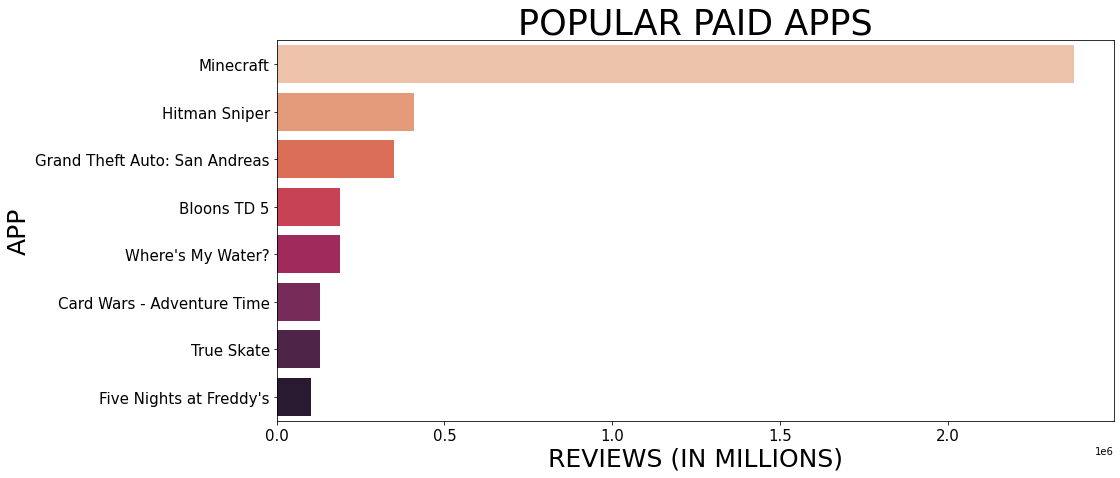

In [45]:
plt.figure(figsize=[15,7])
sbn.barplot(x='Reviews',y='App',data=popular_paid_apps,palette='rocket_r')
plt.xlabel('REVIEWS (IN MILLIONS)',fontsize=25)
plt.ylabel('APP',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('POPULAR PAID APPS',fontsize=35)
plt.show()

From the above bar chart and information we can see that most of the paid apps come under belts of categories like Family,games,etc...

**CONTENT RATING**

In [46]:
content_rtg=apps['Content Rating'].value_counts()
content_rtg

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

*Adults only and Unrated contents have in combined 5 apps so lets drop those..that may not hinder our output...*

In [47]:
lab=['Everyone','Teen','Mature 17+','Everyone 10+']

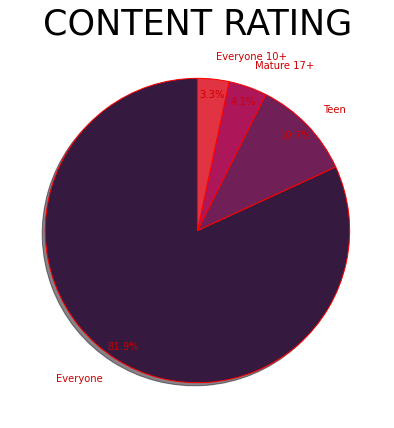

In [48]:
plt.figure(figsize=[7,7])
plt.pie(content_rtg[:4],wedgeprops={'edgecolor':'red'},textprops={'color':'#cc0000'},startangle=90,shadow=True,labels=lab,labeldistance=1.15,autopct='%1.1f%%',pctdistance=0.9,colors=sbn.color_palette('rocket'))
plt.title('CONTENT RATING',fontsize=35)
plt.show()

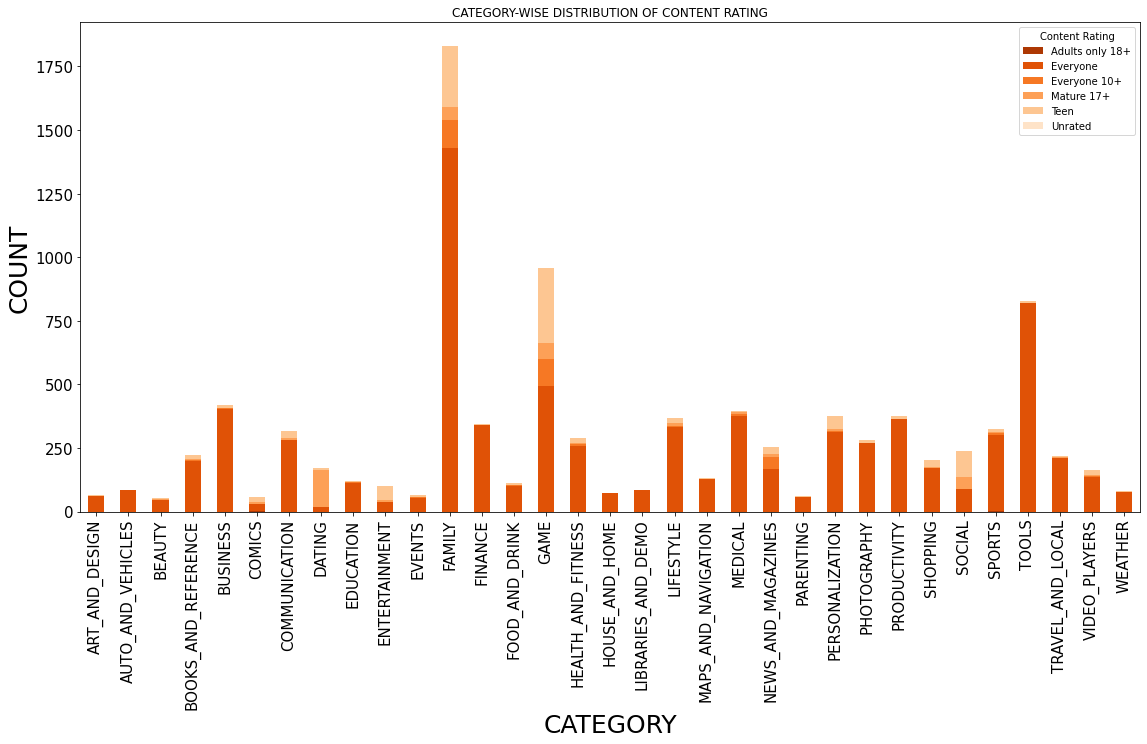

In [49]:
plt.rcParams['figure.figsize']=19,9
content_rating=apps.groupby(['Content Rating','Category']).size().reset_index().pivot(columns='Content Rating',index='Category',values=0)
content_rating.plot(kind='bar',stacked=True,color=sbn.color_palette('Oranges_r'))
plt.xlabel('CATEGORY',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CATEGORY-WISE DISTRIBUTION OF CONTENT RATING')
plt.show()

Here we can see that mostly everyone can use any app...Though, Game Category is popular in teens,Dating and Social Media Categories are poupluar in Mature 17+ Adults...

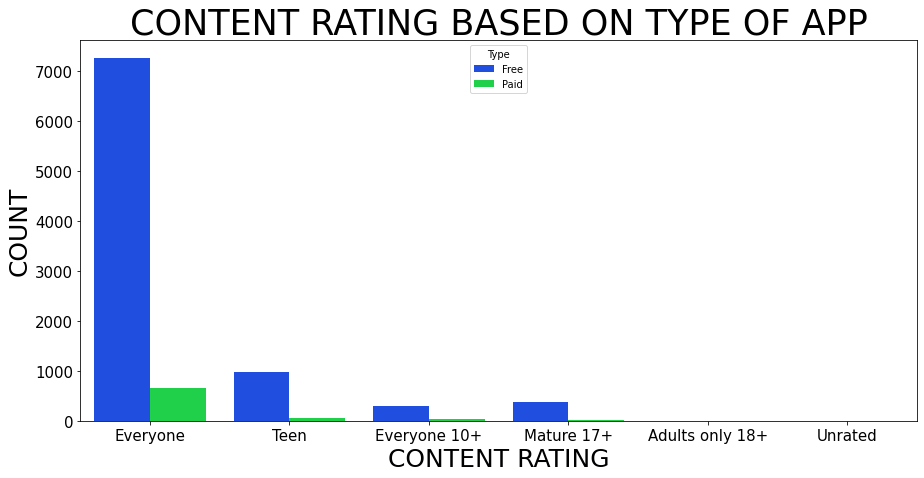

In [50]:
plt.figure(figsize=[15,7])
sbn.countplot(x='Content Rating',data=apps,hue='Type')
plt.xlabel('CONTENT RATING',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('CONTENT RATING BASED ON TYPE OF APP',fontsize=35)
plt.show()

**GENRES**

In [51]:
genres = apps['Genres'].value_counts()
genres

Tools                                 826
Entertainment                         561
Education                             510
Business                              420
Medical                               395
                                     ... 
Video Players & Editors;Creativity      1
Art & Design;Action & Adventure         1
Tools;Education                         1
Adventure;Brain Games                   1
Health & Fitness;Education              1
Name: Genres, Length: 118, dtype: int64

There are many genres lets see top 10...

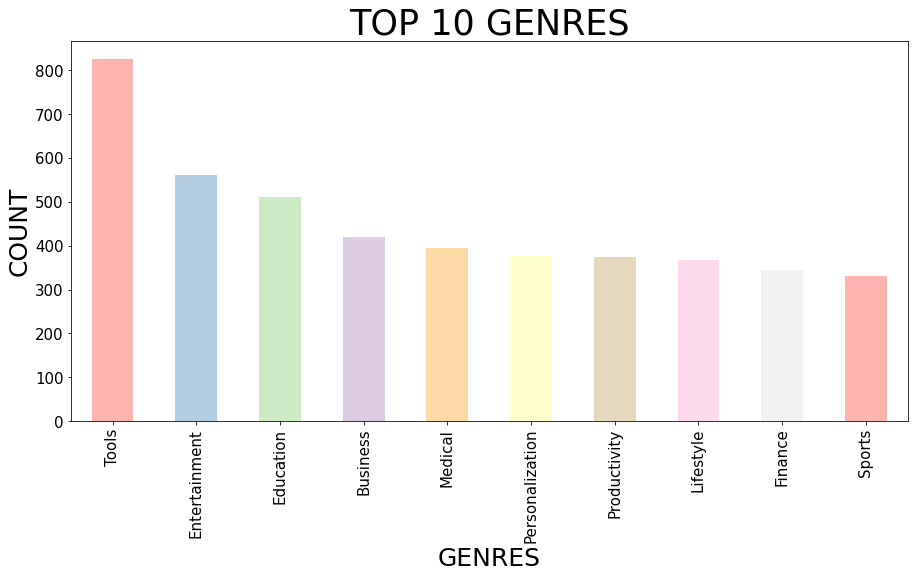

In [52]:
plt.figure(figsize=[15,7])
genres[:10].plot.bar(color=sbn.color_palette('Pastel1'))
plt.xlabel('GENRES',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('TOP 10 GENRES',fontsize=35)
plt.show()

Tools,Entertainment,Education,etc genres are top genres....

**ANDROID VERSION**

In [53]:
apps['Android Ver'].nunique()

33

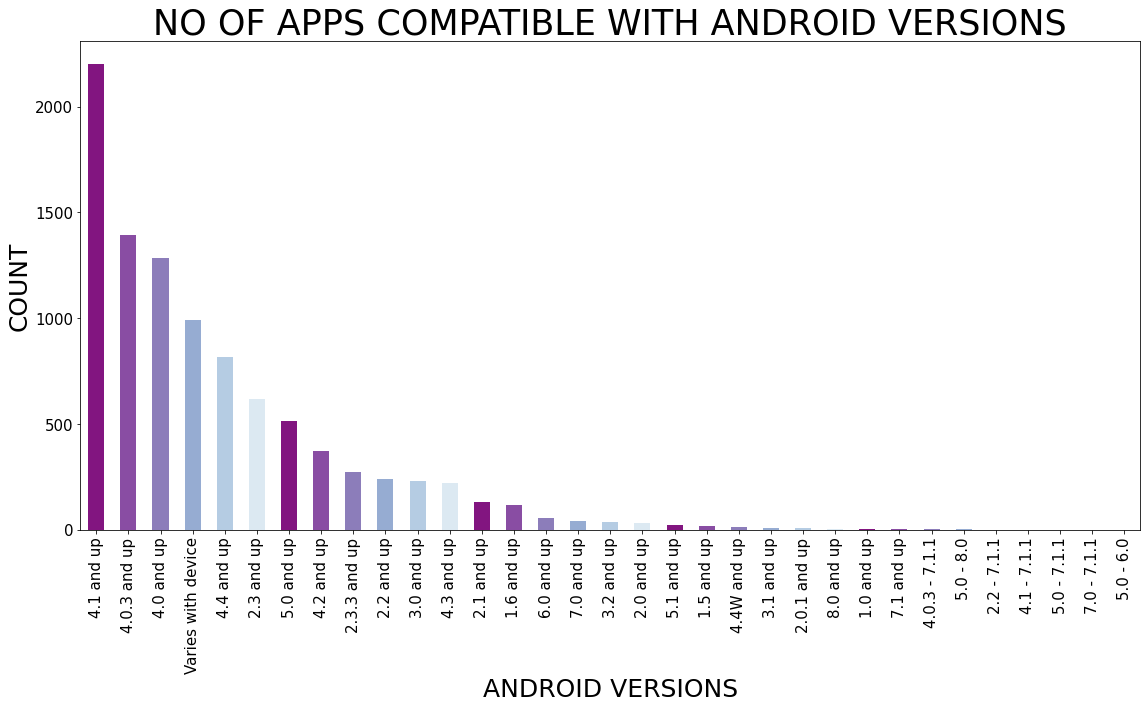

In [54]:
apps['Android Ver'].value_counts().plot.bar(color=sbn.color_palette('BuPu_r'))
plt.xlabel('ANDROID VERSIONS',fontsize=25)
plt.ylabel('COUNT',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('NO OF APPS COMPATIBLE WITH ANDROID VERSIONS',fontsize=35)
plt.show()

From the above chart we can see that most of the apps run on android devices with version greater that 4.0.0 i.e Android Version Ice-Cream Sandwich...

**YEAR OF UPDATE**

In [55]:
apps['year_of_update'].value_counts()

2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: year_of_update, dtype: int64

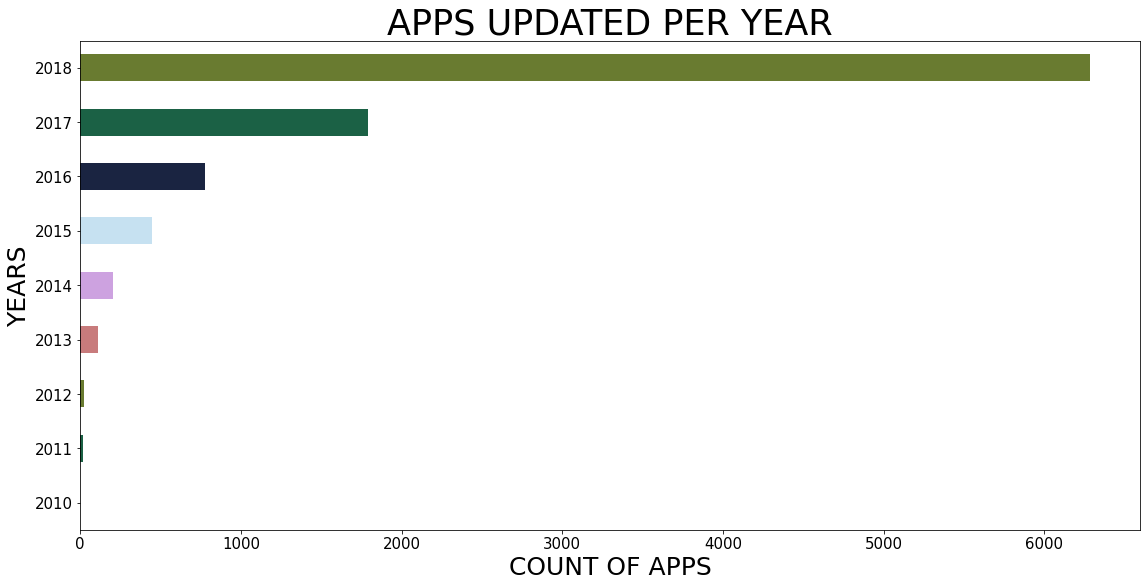

In [56]:
apps.year_of_update.value_counts()[::-1].plot.barh(color=sbn.color_palette('cubehelix'))
plt.xlabel('COUNT OF APPS',fontsize=25)
plt.ylabel('YEARS',fontsize=25)
plt.tick_params(labelsize=15)
plt.title('APPS UPDATED PER YEAR',fontsize=35)
plt.show()

**We can see as the year passed the apps got updated and more and more modification was introduced in apps....**

***Upvote if you learnt a new thing by reading this notebook....***

# THANK YOU FOR READING....WORK IN PROCESS...